In [9]:
import matplotlib.pyplot as plt
import numpy as np

We want to create a picture of a shaded sphere like in the lecture slides, which means we need to first define a spherical surface. 
Let us assume that it has a radius of r=100.

You can now define the surface as a parametrization of z-values using z= z(x,y),
which determines the points that satisfy the condition of being on the sphere. 

In [10]:
def init_ax(ax: plt.Axes):
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(False)
    ax.set_axis_off()
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim(-130, 130)
    ax.set_ylim(-130, 130)
    ax.set_zlim(-130, 130)

def to_cartesian(r: float, thetas: list[float], phies: list[float]) -> tuple[np.array, np.array, np.array]:
    '''
    Parameters:
        r (float): Radius
        theta (np.array): Zenith angle (latitude)
        phi (np.array): Azimuth angle (longitude)

    Returns: 
        Tuple[np.array, np.array, np.array]: (x, y, z) in Cartesian coordinates
    '''
    x, y, z = [], [], []

    for i in thetas:
        xi, yi, zi = [], [], []
        for j in phies:
            xi.append(r * np.sin(i) * np.cos(j))
            yi.append(r * np.sin(i) * np.sin(j))
            zi.append(r * np.cos(i))
        x.append(xi)
        y.append(yi)
        z.append(zi)

    return np.array(x), np.array(y), np.array(z)


def normalize(*args):
    '''
    Parameters:
        *args (list[float]): List of vectors
    Returns:
        list[float]: Normalized vectors
    '''
    norm = sum(arg**2 for arg in args) ** 0.5
    return [arg / norm for arg in args]


def get_intensity(r: float, x:list[float], y:list[float], z:list[float], l:tuple[float, float, float]) -> list[float]:
    '''
    Parameters:
        r (float): radius of sphere
        x (list[float]): x in Cartesian coordinates
        y (list[float]): y in Cartesian coordinates
        z (list[float]): z in Cartesian coordinates
        l (tuple[x, y, z]): Light source Cartesian coordinates
    Returns:
        list[float] : Intensity of points
    '''

    # Partial derivatives
    # Nx = x / z
    # Ny = y / z
    # Nz = 1
    # Nx, Ny, Nz = normalize(Nx, Ny, Nz)
    Nx = (x / r)
    Ny = (y / r)
    Nz = (z / r)

    # Normalize vectors
    Lx, Ly, Lz = normalize(np.array(l[0]), np.array(l[1]), np.array(l[2]))

    return np.maximum(0, Lx * Nx + Ly * Ny + Lz * Nz)



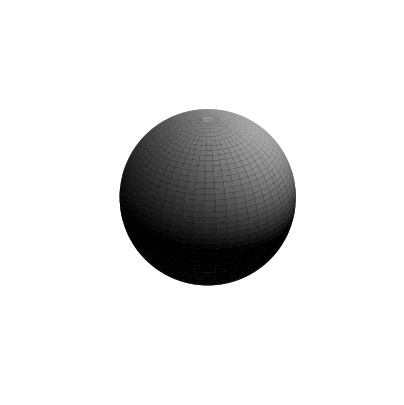

In [14]:
%matplotlib inline
def assignment1():    
    # 1. Create samples of theta and phi
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2*np.pi, 100)
    r = 100

    # 2. Convert to Cartesian coordinates
    x, y, z = to_cartesian(r=r, thetas=theta, phies=phi)

    # 3. Get intensity
    intensity = get_intensity(r, x, y, z, l=(0.13, 0, 0.94))

    # 3. Rendering Sphere
    figure = plt.figure(figsize=(5, 5))
    ax = figure.add_subplot(111, projection='3d')
    init_ax(ax)

    colormap = plt.cm.gray(intensity)
    ax.plot_surface(x, y, z, facecolors=colormap, edgecolor='none')
    plt.show()

assignment1()

In [25]:
%matplotlib notebook

from matplotlib import animation
from IPython.display import HTML

def to_cartesian_singlepoint(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z


def update_intensity(frame, r, x, y, z, ax: plt.Axes, frame_length):
    ax.clear()
    init_ax(ax)

    theta = np.pi/2
    phi = 2 * np.pi * (frame+1)/frame_length
    ls_offset = 50
    
    lx, ly, lz = to_cartesian_singlepoint(r=r+ls_offset, theta=theta, phi=phi)
    intensity = get_intensity(r, x, y, z, (lx, ly, lz))
    colormap = plt.cm.grey(intensity)

    surface = ax.plot_surface(x, y, z, facecolors=colormap, edgecolor='none')
    light_point = ax.scatter(lx, ly, lz, color='red', s=20)
    coord_text = f"({lx:.1f}, {ly:.1f}, {lz:.1f})"
    light_coord = ax.text(lx, ly, lz, coord_text, color='black', fontsize=8)

    return [surface, light_point, light_coord]


def assignment1_bonus():
    # 1. Create samples of theta and phi
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2*np.pi, 100)
    r = 100

    # 2. Convert to Cartesian coordinates
    x, y, z = to_cartesian(r=r, thetas=theta, phies=phi)

    # 3. Rendering Sphere
    figure = plt.figure(figsize=(5, 5))
    ax = figure.add_subplot(111, projection='3d')

    # 4. Animate it
    frame_length = 30
    ani = animation.FuncAnimation(figure, lambda frame: update_intensity(frame, r, x, y, z, ax, frame_length), frames=frame_length)
    return HTML(ani.to_jshtml())

assignment1_bonus()

<IPython.core.display.Javascript object>

In [109]:
# get a figure that plot size defined
figure = plt.figure(figsize=(5, 5))

# add subplot to first row/column in figure
ax = figure.add_subplot(111, projection='3d')

# set ticks for each axis
labels = list(range(0,101,20))
# ax.set_xticks(labels)
# ax.set_yticks(labels)
# ax.set_zticks(labels)


def get_z(x, y, r=100):
    '''
    Equation: x^2 + y^2 + z^2 = r^2
    return: array-like number
    '''
    # using np.array for calculation
    x = np.array(x)
    y = np.array(y)
    z = (r**2 - x**2 - y**2) ** 0.5
    return [z, -z]

x = list(range(1, 100))
y = list(range(1, 100))
z = get_z(x, y)

ax.scatter(x, y, z)
plt.show()


<IPython.core.display.Javascript object>

C:\Users\DMQA\AppData\Local\Temp\ipykernel_26812\2233756463.py:22: RuntimeWarning: invalid value encountered in power
  z = (r**2 - x**2 - y**2) ** 0.5


In [28]:
# 1. Get coordination of sphere
def to_cartesian(r: float, theta: list, phi: list) -> tuple[np.array, np.array, np.array]:
    '''
    Parameters:
        r (float): Radius
        theta (np.array): Zenith angle (latitude)
        phi (np.array): Azimuth angle (longitude)
        
    Returns:
        Tuple[np.array, np.array, np.array]: (x, y, z) in Cartesian coordinates
    '''
    x, y, z = [], [], []

    for i in theta:
        xi, yi, zi = [], [], []
        for j in phi:
            xi.append(r * np.sin(i) * np.cos(j))
            yi.append(r * np.sin(i) * np.sin(j))
            zi.append(r * np.cos(i))
        x.append(xi)
        y.append(yi)
        z.append(zi)

    return np.array(x), np.array(y), np.array(z)


## 1.1 Create samples of theta and phi
freq = 64
thetas = [i * (np.pi / freq) for i in range(freq + 1)]
phies = [i * (2 * np.pi / freq) for i in range(freq + 1)]

x, y, z = to_cartesian(r=100, theta=thetas, phi=phies)


# 2. Rendering Sphere
## 2.1 get a figure that plot size defined
figure = plt.figure(figsize=(5, 5))

## 2.2 add subplot to first row/column in figure
ax = figure.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)

<IPython.core.display.Javascript object>